In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import copy as cp
from typing import Tuple
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('stars.csv')
print(df.head(4))

print('\nChecking for null values:')
df.isnull().sum()


   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068            0.0024        0.1700                   16.12   
1             3042            0.0005        0.1542                   16.60   
2             2600            0.0003        0.1020                   18.70   
3             2800            0.0002        0.1600                   16.65   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  

Checking for null values:


Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

# **Data Preprocessing**

In [ ]:
df['Star color'] = df['Star color'].str.replace(' ', '')
df['Star color'] = df['Star color'].str.lower()
print(df['Star color'].unique()) 

['red' 'bluewhite' 'white' 'yellowishwhite' 'paleyelloworange' 'blue'
 'blue-white' 'whitish' 'yellow-white' 'orange' 'white-yellow' 'yellowish'
 'orange-red']


# **EDA and Data Visualization**

In [ ]:
boxcol = ['Temperature (K)',  'Luminosity(L/Lo)',  'Radius(R/Ro)',  'Absolute magnitude(Mv)']
for feat in boxcol:
    fig = px.box(df, y = feat, x = 'Star type', color = 'Star type')
    fig.show() 

In [ ]:
fig = px.bar(df, y = 'Star color', color = 'Star type',category_orders= ({'Star type': [0,1,2,3,4,5]}))
fig.show()

In [ ]:
fig = px.bar(df, y = 'Spectral Class', color = 'Star type')
fig.show()

In [ ]:
fig = px.scatter(df, y = 'Temperature (K)', x = 'Radius(R/Ro)', color = 'Star type')
fig.show()

In [ ]:
fig = px.scatter(df, x="Temperature (K)", y ="Absolute magnitude(Mv)", color = 'Star type', title = 'Temperature vs Absolute Magnitude')
fig.show()

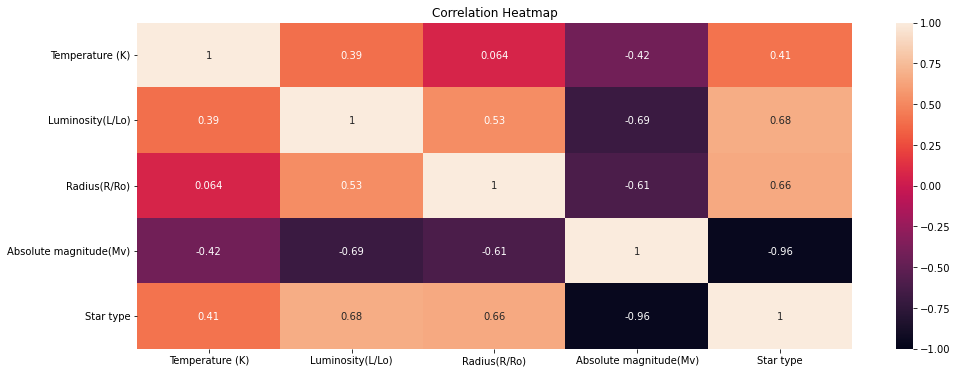

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()

In [ ]:
fig = px.scatter(df, y="Luminosity(L/Lo)", x ="Absolute magnitude(Mv)", color = 'Star type', title = 'Luminosity vs Absolute Magnitude')
fig.show()

In [ ]:
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

df['Star color'] = le1.fit_transform(df['Star color'])
df['Spectral Class'] = le2.fit_transform(df['Spectral Class'])

features = list(df.columns)
features.remove('Star type')
X = df[features]
y = df['Star type']


In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('accuracy: ', np.mean(scores)*100)

accuracy:  99.58333333333333


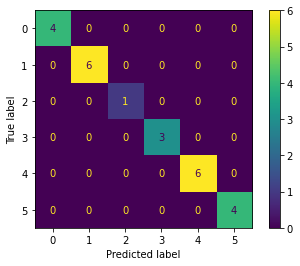

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,shuffle=True)
model.fit(X_train,y_train)
predicted = model.predict(X_test)
cfm = confusion_matrix(predicted,y_test,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,display_labels=model.classes_) 
disp.plot()

In [ ]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))
        
        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [ ]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array):

    matrix = confusion_matrix(actual_classes, predicted_classes)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

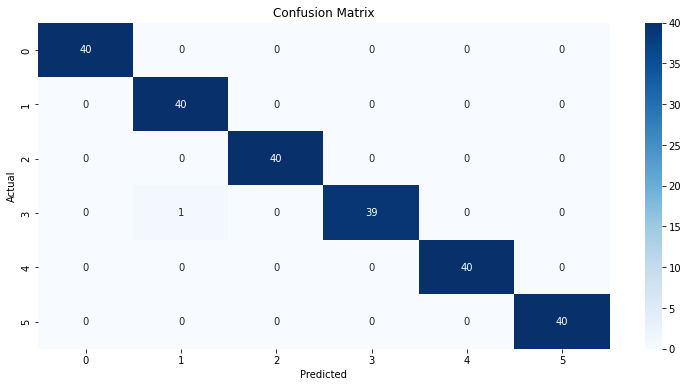

Accuracy:  0.9958333333333333


In [ ]:
actual_classes, predicted_classes, _ = cross_val_predict(model, cv, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes)
print('Accuracy: ',accuracy_score(actual_classes, predicted_classes))